# Instacart Data Visualization

# Table of Contents

1️⃣ **Instacart Data Visualization Overview**  
2️⃣ **Importing Libraries and Loading Data**  
3️⃣ **Orders by Hour of Day (Histogram)**  
4️⃣ **Prices by Hour of Day (Line Chart)**  
5️⃣ **Customer Loyalty Distribution (Bar Chart)**  
6️⃣ **Customer Income by Age (Scatterplot)**  
7️⃣ **Age vs. Number of Dependents (Bar Chart)**  
8️⃣ **Exporting Visualizations**  
9️⃣ **Interpretation of Results**


This notebook is for **Exercise 4.9: Intro to Data Visualization with Python (Part 2)**.  
We will explore customer data and create visualizations to better understand ordering patterns and trends.

---

## Import Libraries & Load Data

We import the following libraries:

- **pandas** and **numpy**: For data handling.
- **os**: For working with file paths.
- **matplotlib.pyplot** and **seaborn**: For plotting.
- **scipy**: For any additional statistical needs.

Next, we load the prepared dataframe `ords_prods_cust_merge.pkl`, which contains customer and order data merged together. We preview the first few rows to confirm successful import.


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Set the path to your main project folder
path = r'C:\Users\rhysm\OneDrive\Desktop\Career Foundry\Data Immersion\Module 4\04-2025 Instacart Basket Analysis'

# Import the prepared dataframe with customer data
ords_prods_cust_merge = pd.read_pickle(os.path.join(
    path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

ords_prods_cust_merge.head()


,Unnamed: 0.1_x,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,merge_status,first_name,last_name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,1,1,2398795,1,2,3,7,15.0,196,1,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,1,2398795,1,2,3,7,15.0,10258,2,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,1,1,2398795,1,2,3,7,15.0,12427,3,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,1,1,2398795,1,2,3,7,15.0,13176,4,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,1,1,2398795,1,2,3,7,15.0,26088,5,...,both,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Histogram: Orders by Hour of Day

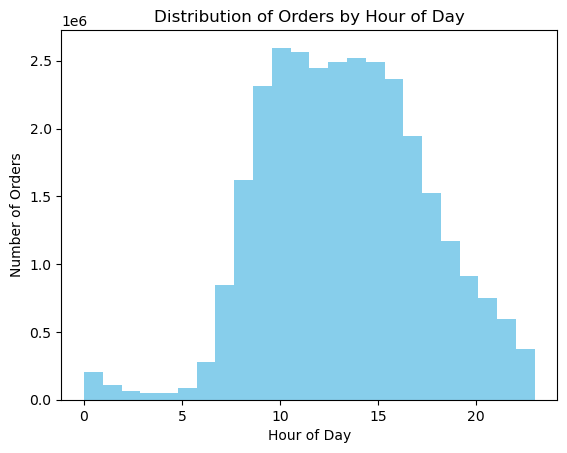

In [4]:
hist = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins=24, color='skyblue')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

# Export
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))


**What the histogram shows:**

This histogram shows when most Instacart orders are placed throughout the day. We can observe clear peaks between 9 AM and 5 PM, with the highest order volume around mid to late morning. Activity drops off significantly in the late evening and early morning hours.

## Bar Chart: Customer Loyalty Distribution

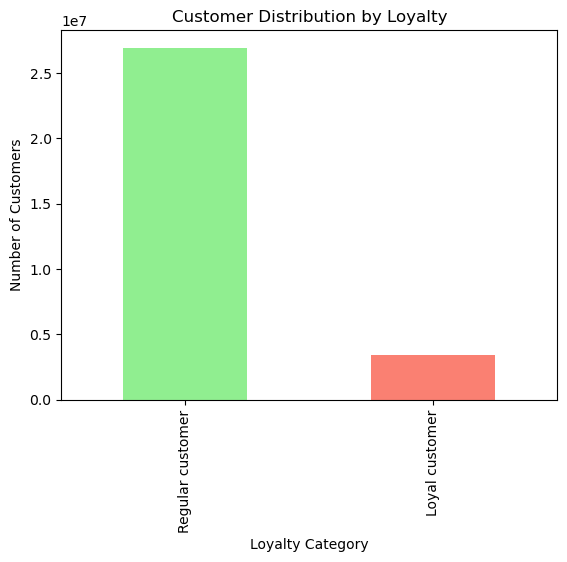

In [7]:
# Create loyalty_flag if not present
if 'loyalty_flag' not in ords_prods_cust_merge.columns:
    ords_prods_cust_merge['loyalty_flag'] = np.where(ords_prods_cust_merge['order_number'] > 40, 'Loyal customer', 'Regular customer')

bar = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar(color=['lightgreen', 'salmon'])
plt.title('Customer Distribution by Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.show()

# Export
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))


**What the bar chart shows:**

This chart displays the distribution between loyal and regular customers. Loyal customers are those who have placed more than 40 orders. The majority of customers fall into the regular category, indicating that long-term loyalty may be an opportunity area.

## Line Chart: Prices by Hour of Day

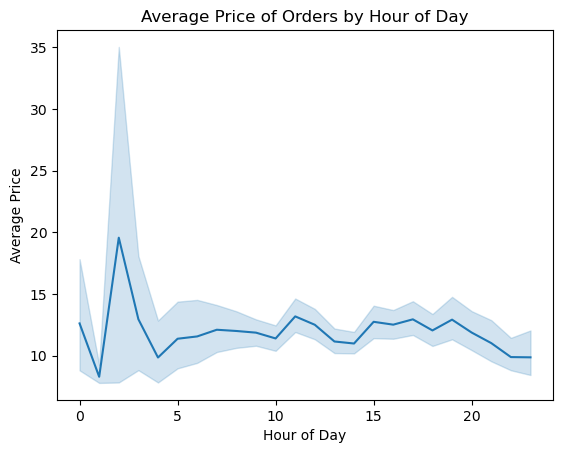

In [10]:
# Sampling
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7
small = ords_prods_cust_merge[~dev]

df_2 = small[['order_hour_of_day','prices']]

line = sns.lineplot(data=df_2, x='order_hour_of_day', y='prices')
plt.title('Average Price of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.show()

# Export
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_by_hour.png'))


**What the line chart shows:**

This chart illustrates the trend in average product prices throughout different hours of the day. We can see modest fluctuations, but overall, prices remain relatively stable, suggesting no major time-based pricing effects.

## Bar Plot: Age vs. Number of Dependents

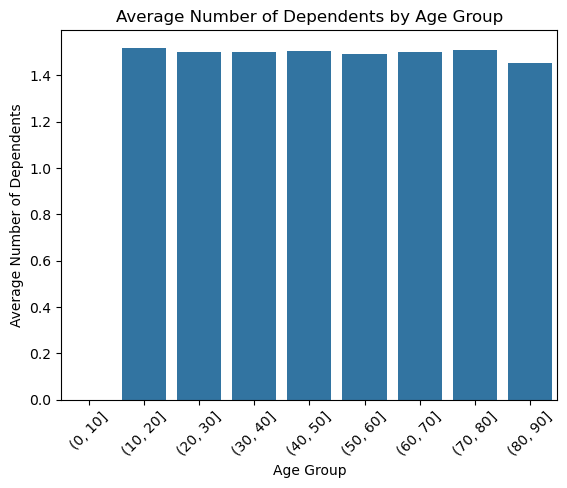

In [28]:
# Plot as a barplot instead
age_dep = sns.barplot(data=age_group_agg, x='age_group', y='n_dependants')
plt.title('Average Number of Dependents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Dependents')
plt.xticks(rotation=45)
plt.show()

# Export
age_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_dependents_binned.png'))


**What the line chart shows:**

This chart shows how the number of dependents varies across age groups. Typically, dependents increase in the mid-age range (30–50), aligning with common family-building years, and taper off as age increases.

## Scatterplot: Age vs. Income

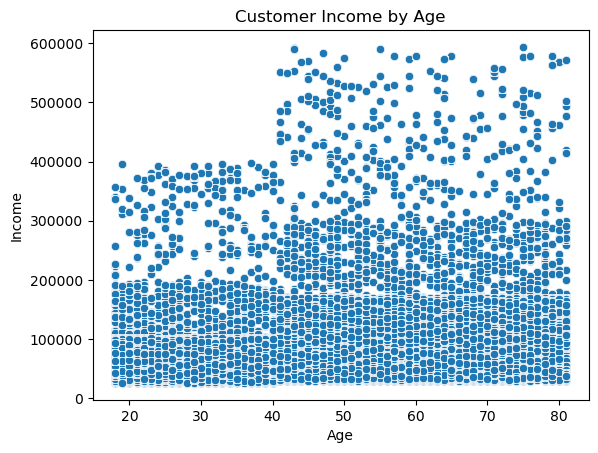

In [16]:
scatter = sns.scatterplot(x='Age', y='income', data=ords_prods_cust_merge)
plt.title('Customer Income by Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Export
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))


**What the scatterplot shows:**

This scatterplot highlights the relationship between age and income. We can observe that while income varies across all ages, higher income levels are typically concentrated in the 30–60 age range, reflecting typical earning peaks.